# Africa Food Production

#### # Import packages

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats

#### # Food production dataset

In [406]:
proddataset = pd.read_csv('Africa Food Production.csv')
proddataset.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [407]:
proddataset.shape

(23110, 4)

In [408]:
proddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 541.7+ KB


In [409]:
proddataset.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

#### # Grouping the dataset

In [410]:
proddataset.groupby(["Country", "Year"])["Value"].sum()
proddatasetgrouped = pd.DataFrame(proddataset)
proddatasetgrouped

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [411]:
proddatasetgrouped = pd.DataFrame(proddataset.groupby(['Country','Year'])['Value'].sum())
#.first()
proddatasetgrouped.reset_index(['Country','Year'],inplace = True)
proddatasetgrouped

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


#### # Line plot of Food producing Countries

[Text(0.5, 1.0, 'Food Producing Countries')]

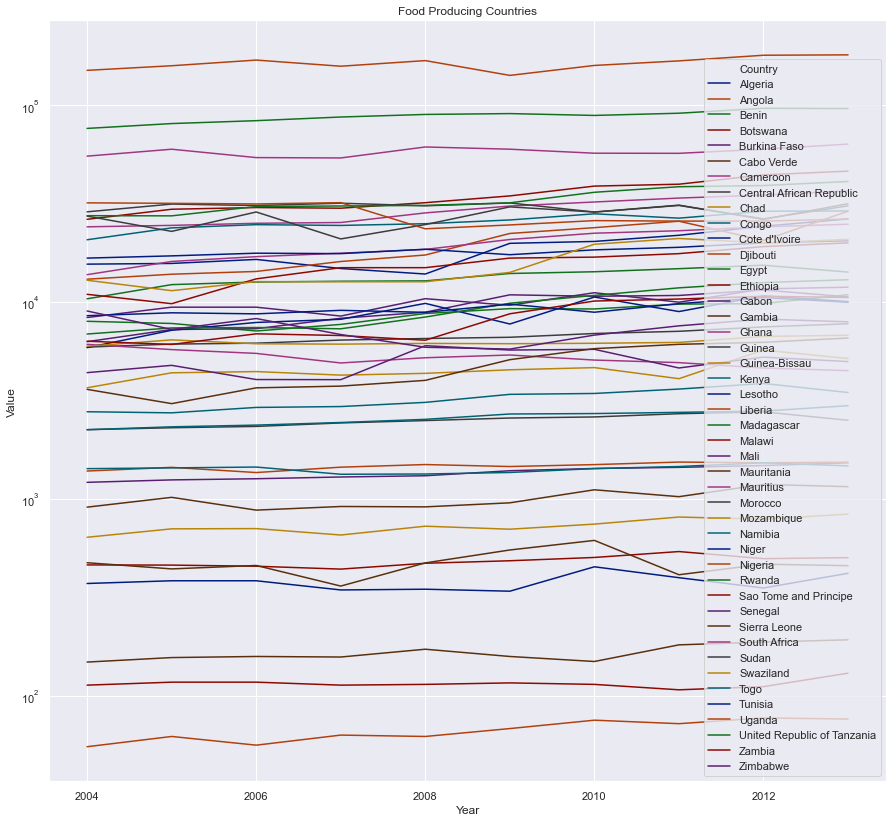

In [412]:
sns.set(rc = {'figure.figsize':(15,14)})
proddatasetlp = sns.lineplot(x  ='Year', y = 'Value', hue = 'Country', palette = 'dark', ci = None, data = proddatasetgrouped)
proddatasetlp.set(yscale = 'log')
proddatasetlp.set(Title =  'Food Producing Countries')

#### # Map View Food Producting Countries

In [413]:
proddatasetmap = px.choropleth(proddatasetgrouped, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
proddatasetmap.update_geos(fitbounds  ="locations", visible = True)
proddatasetmap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
proddatasetmap.show()  

# Africa Food Supply

#### # Food supply dataset

In [414]:
supplydataset = pd.read_csv('Africa Food Supply.csv')
supplydataset.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [415]:
supplydataset.shape

(450, 3)

In [416]:
supplydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ KB


In [417]:
supplydataset.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

#### # Grouping the dataset

In [418]:
supplydataset.groupby(["Country", "Year"])["Value"].sum()
supplydatasetgrouped = pd.DataFrame(supplydataset)
supplydatasetgrouped

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


#### # Line plot of Food supplying Countries

[Text(0.5, 1.0, 'Food Supplying Countries')]

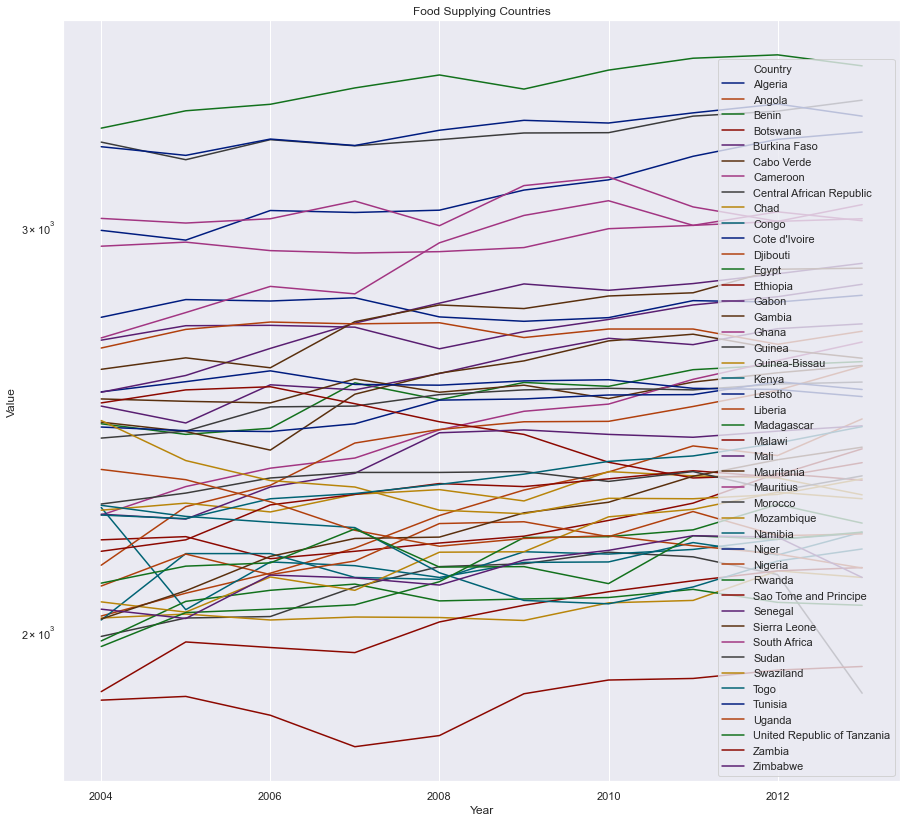

In [419]:
sns.set(rc = {'figure.figsize':(15,14)})
supplydatasetlp = sns.lineplot(x  ='Year', y = 'Value', hue = 'Country', palette = 'dark', ci = None, data = supplydatasetgrouped)
supplydatasetlp.set(yscale = 'log')
supplydatasetlp.set(Title =  'Food Supplying Countries')

#### # Map View Food Supplying Countries

In [420]:
supplydatasetmap = px.choropleth(supplydatasetgrouped, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
supplydatasetmap.update_geos(fitbounds  ="locations", visible = True)
supplydatasetmap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
supplydatasetmap.show() 

# Quartiles

In [421]:
Q1 = supplydatasetgrouped.Value.quantile(0.25)
Q3 = supplydatasetgrouped.Value.quantile(0.75)
Q1,Q3

(2174.0, 2681.75)

#### # Interquartile Range

In [422]:
IQR = Q3 - Q1
IQR

507.75

#### # Outlier

In [423]:
lower_limit = Q3 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(1920.125, 3443.375)

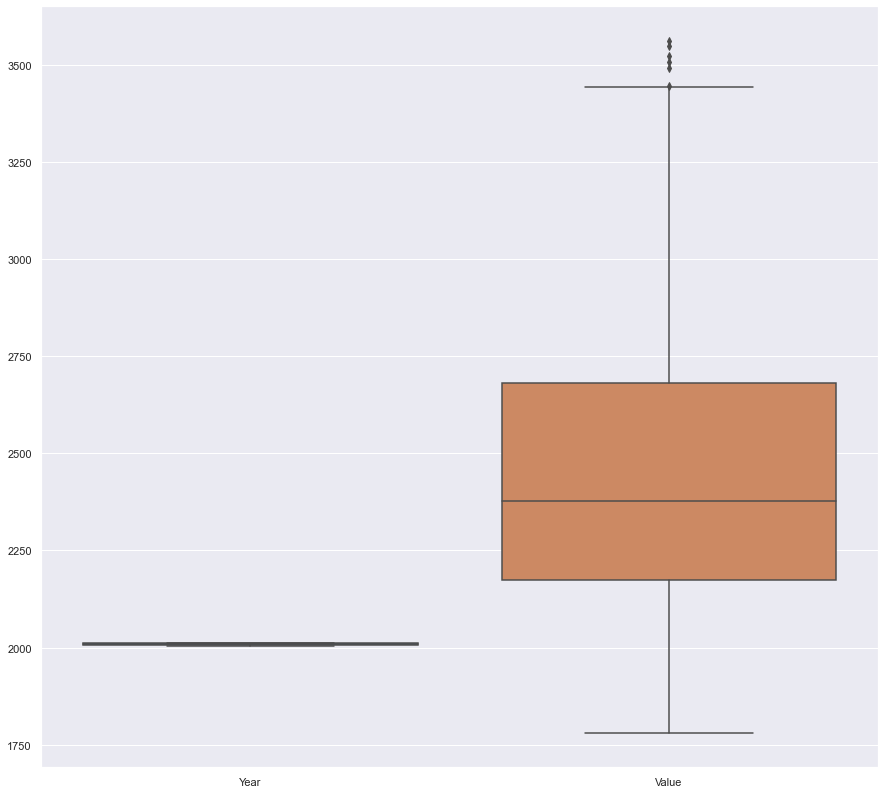

In [424]:
boxplot = sns.boxplot(data = supplydatasetgrouped)

In [425]:
supply = supplydatasetgrouped[supplydatasetgrouped['Year'] == 2012]
supply

,Country,Year,Value
8,Algeria,2012,3272
18,Angola,2012,2384
28,Benin,2012,2610
38,Botswana,2012,2342
48,Burkina Faso,2012,2707
58,Cabo Verde,2012,2590
68,Cameroon,2012,2622
78,Central African Republic,2012,2116
88,Chad,2012,2124
98,Congo,2012,2158


#### # Scatterplot Showing Outliers

In [426]:
scatterplot = px.scatter(supply, x='Country', y='Value', 
                color='Country')

scatterplot.update_traces(textposition = 'top center')
scatterplot.update_xaxes(showticklabels = False)
scatterplot.show()

## Population Database

In [427]:
population = pd.read_csv('Population.csv', skiprows= 4)
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [428]:
population.shape

(264, 65)

#### # Selecting columns country name and population from year 2004 to 2013

In [429]:
population = population[['Country Name','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
population

,Country Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0
1,Afghanistan,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
3,Albania,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0
4,Andorra,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0
...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
260,"Yemen, Rep.",19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0
261,South Africa,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0
262,Zambia,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0


#### # Renaming Country Name to Country

In [430]:
population = population.rename(columns = {'Country Name': 'Country'}, inplace = False)
population

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0
1,Afghanistan,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
3,Albania,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0
4,Andorra,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0
...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
260,"Yemen, Rep.",19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0
261,South Africa,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0
262,Zambia,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0


#### # Converting the years into rows

In [431]:
population = pd.melt(population,id_vars = ['Country'], var_name = 'Year')
population

,Country,Year,value
0,Aruba,2004,98737.0
1,Afghanistan,2004,24726684.0
2,Angola,2004,18758145.0
3,Albania,2004,3026939.0
4,Andorra,2004,76244.0
...,...,...,...
2635,Kosovo,2013,1818117.0
2636,"Yemen, Rep.",2013,25147109.0
2637,South Africa,2013,53689236.0
2638,Zambia,2013,14926504.0


#### # Converting "Year" from object to integer

In [432]:
population["Year"] = population["Year"].astype(str).astype(int)
population

,Country,Year,value
0,Aruba,2004,98737.0
1,Afghanistan,2004,24726684.0
2,Angola,2004,18758145.0
3,Albania,2004,3026939.0
4,Andorra,2004,76244.0
...,...,...,...
2635,Kosovo,2013,1818117.0
2636,"Yemen, Rep.",2013,25147109.0
2637,South Africa,2013,53689236.0
2638,Zambia,2013,14926504.0


In [433]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  2640 non-null   object 
 1   Year     2640 non-null   int32  
 2   value    2628 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 41.3+ KB


#### # Replacing Country names with new Country names

In [434]:
population['Country'] = population['Country'].replace(['Egypt, Arab Rep.'], 'Egypt')
population['Country'] = population['Country'].replace(['Congo, Rep.'], 'Congo')
population['Country'] = population['Country'].replace(['Gambia, The'], 'Gambia')
population['Country'] = population['Country'].replace(['Eswatini'], 'Swaziland')
population['Country'] = population['Country'].replace(['Tanzania'], 'United Republic of Tanzania')

#### # Rename value column as population

In [435]:
population = population.rename(columns = {'value':'Population'}, inplace = False)
population.tail(140)

,Country,Year,Population
2500,"Korea, Rep.",2013,50428893.0
2501,Kuwait,2013,3526376.0
2502,Latin America & Caribbean (excluding high income),2013,578502021.0
2503,Lao PDR,2013,6541304.0
2504,Lebanon,2013,5914621.0
...,...,...,...
2635,Kosovo,2013,1818117.0
2636,"Yemen, Rep.",2013,25147109.0
2637,South Africa,2013,53689236.0
2638,Zambia,2013,14926504.0


#### # Groupby the country name and year

In [436]:
population = population.groupby(['Country', 'Year']).mean().reset_index()
population

,Country,Year,Population
0,Afghanistan,2004,24726684.0
1,Afghanistan,2005,25654277.0
2,Afghanistan,2006,26433049.0
3,Afghanistan,2007,27100536.0
4,Afghanistan,2008,27722276.0
...,...,...,...
2635,Zimbabwe,2009,12526968.0
2636,Zimbabwe,2010,12697723.0
2637,Zimbabwe,2011,12894316.0
2638,Zimbabwe,2012,13115131.0


### # Rice Production Dataset

In [437]:
rice = proddataset[proddataset['Item'] == 'Rice (Milled Equivalent)']
rice.head(100)

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004,0
11,Algeria,Rice (Milled Equivalent),2005,0
12,Algeria,Rice (Milled Equivalent),2006,0
13,Algeria,Rice (Milled Equivalent),2007,0
14,Algeria,Rice (Milled Equivalent),2008,0
...,...,...,...,...
5675,Egypt,Rice (Milled Equivalent),2009,3682
5676,Egypt,Rice (Milled Equivalent),2010,2888
5677,Egypt,Rice (Milled Equivalent),2011,3785
5678,Egypt,Rice (Milled Equivalent),2012,3943


In [438]:
rice.groupby('Year').mean().reset_index()

,Year,Value
0,2004,326.789474
1,2005,348.763158
2,2006,379.026316
3,2007,361.500000
4,2008,420.289474
5,2009,405.842105
6,2010,457.315789
7,2011,454.157895
8,2012,482.394737
9,2013,489.578947


In [439]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 10 to 22489
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  380 non-null    object
 1   Item     380 non-null    object
 2   Year     380 non-null    int64 
 3   Value    380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.9+ KB


In [440]:
population.reset_index()

,index,Country,Year,Population
0,0,Afghanistan,2004,24726684.0
1,1,Afghanistan,2005,25654277.0
2,2,Afghanistan,2006,26433049.0
3,3,Afghanistan,2007,27100536.0
4,4,Afghanistan,2008,27722276.0
...,...,...,...,...
2635,2635,Zimbabwe,2009,12526968.0
2636,2636,Zimbabwe,2010,12697723.0
2637,2637,Zimbabwe,2011,12894316.0
2638,2638,Zimbabwe,2012,13115131.0


#### # Merging Rice Production and Population Dataset

In [441]:
ricepopulation = pd.merge(rice, population, on=('Country', 'Year'))
ricepopulation.head(20)

,Country,Item,Year,Value,Population
0,Algeria,Rice (Milled Equivalent),2004,0,32692163.0
1,Algeria,Rice (Milled Equivalent),2005,0,33149724.0
2,Algeria,Rice (Milled Equivalent),2006,0,33641002.0
3,Algeria,Rice (Milled Equivalent),2007,0,34166972.0
4,Algeria,Rice (Milled Equivalent),2008,0,34730608.0
5,Algeria,Rice (Milled Equivalent),2009,0,35333881.0
6,Algeria,Rice (Milled Equivalent),2010,0,35977455.0
7,Algeria,Rice (Milled Equivalent),2011,0,36661444.0
8,Algeria,Rice (Milled Equivalent),2012,0,37383887.0
9,Algeria,Rice (Milled Equivalent),2013,0,38140132.0


#### # Testing for hypothesis

#### # Pearson

In [442]:
X = ricepopulation['Population']
Y = ricepopulation['Value']
scipy.stats.pearsonr(X, Y)

(0.5736913576846122, 1.2234548112829303e-34)

#### # coorelation

In [443]:
scipy.stats.pearsonr(X, Y)[0]

0.5736913576846122

## Visualization

In [444]:
ricepopulation

,Country,Item,Year,Value,Population
0,Algeria,Rice (Milled Equivalent),2004,0,32692163.0
1,Algeria,Rice (Milled Equivalent),2005,0,33149724.0
2,Algeria,Rice (Milled Equivalent),2006,0,33641002.0
3,Algeria,Rice (Milled Equivalent),2007,0,34166972.0
4,Algeria,Rice (Milled Equivalent),2008,0,34730608.0
...,...,...,...,...,...
375,Zimbabwe,Rice (Milled Equivalent),2009,0,12526968.0
376,Zimbabwe,Rice (Milled Equivalent),2010,0,12697723.0
377,Zimbabwe,Rice (Milled Equivalent),2011,0,12894316.0
378,Zimbabwe,Rice (Milled Equivalent),2012,0,13115131.0


#### # Line Plot showing relationship between Rice production and Population

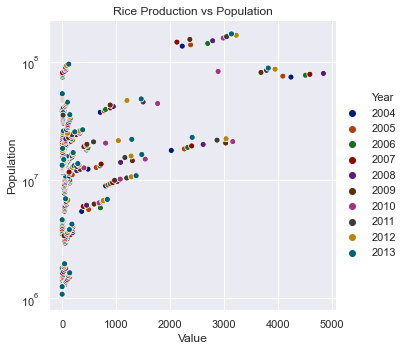

In [445]:
sns.set(rc = {'figure.figsize':(15,14)})
ricefig = sns.relplot(x  ='Value', y = 'Population', hue = 'Year', kind = 'scatter', palette = 'dark', ci = None, data = ricepopulation)
ricefig.set(yscale = 'log')
ricefig.set(Title =  'Rice Production vs Population')

#### # Map Showing amount of rice produced per country from 2004 t0 2013

In [446]:
ricemap = px.choropleth(ricepopulation, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
ricemap.update_geos(fitbounds  ="locations", visible = True)
ricemap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
ricemap.show() 

#### # Intersection

In [447]:
Nigeria = proddataset[proddataset['Country'] == 'Nigeria']
Nigeria.head(100)

,Country,Item,Year,Value
15380,Nigeria,Wheat and products,2004,62
15381,Nigeria,Wheat and products,2005,66
15382,Nigeria,Wheat and products,2006,71
15383,Nigeria,Wheat and products,2007,44
15384,Nigeria,Wheat and products,2008,53
...,...,...,...,...
15475,Nigeria,Yams,2009,29092
15476,Nigeria,Yams,2010,34162
15477,Nigeria,Yams,2011,37116
15478,Nigeria,Yams,2012,40000


In [448]:
Algeria = proddataset[proddataset['Country'] == 'Algeria']
Algeria.head(100)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
95,Algeria,Sugar (Raw Equivalent),2009,0
96,Algeria,Sugar (Raw Equivalent),2010,0
97,Algeria,Sugar (Raw Equivalent),2011,0
98,Algeria,Sugar (Raw Equivalent),2012,0


In [449]:
Nigeria['Item'][Nigeria['Item'].isin(Algeria['Item'])].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Maize and products', 'Sorghum and products', 'Cereals, Other',
       'Potatoes and products', 'Sugar (Raw Equivalent)',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Cottonseed', 'Groundnut Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Citrus, Other', 'Fruits, Other', 'Pimento',
       'Beer', 'Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat',
       'Poultry Meat', 'Meat, Other', 'Offals, Edible', 'Butter, Ghee',
       'Fats, Animals, Raw', 'Eggs', 'Milk - Excluding Butter',
       'Freshwater Fish', 'Demersal Fish', 'Pelagic Fish',
       'Marine Fish, Other', 'Crustaceans', 'Cephalopods',
       'Molluscs, Other'], dtype=object)

In [450]:
list = pd.Series(list(set(Nigeria['Item']).intersection(list(set(Algeria['Item'])))))
list

TypeError: 'Series' object is not callable

# Quiz

#### Question 1

In [451]:
Oats = proddataset[proddataset['Item'] == 'Oats']
Oats.head(100)

,Country,Item,Year,Value
40,Algeria,Oats,2004,89
41,Algeria,Oats,2005,78
42,Algeria,Oats,2006,89
43,Algeria,Oats,2007,92
44,Algeria,Oats,2008,27
...,...,...,...,...
22515,Zimbabwe,Oats,2009,1
22516,Zimbabwe,Oats,2010,1
22517,Zimbabwe,Oats,2011,1
22518,Zimbabwe,Oats,2012,1


In [452]:
oatsmap = px.choropleth(Oats, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
oatsmap.update_geos(fitbounds  ="locations", visible = True)
oatsmap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
oatsmap.show()

Algeria have the higest Amount of Oat production

#### Question 2

In [453]:
supplydatasetmap = px.choropleth(supplydatasetgrouped, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
supplydatasetmap.update_geos(fitbounds  ="locations", visible = True)
supplydatasetmap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
supplydatasetmap.show() 

From the Map, Zambia, Ethiopia and Central African Republic have the lowest supply production.

#### Question 5

In [454]:
ricemap = px.choropleth(ricepopulation, locations = "Country",
                    locationmode = 'country names',
                    color = "Value",
                    hover_name = "Country",             
                    scope = 'africa',  
                    color_continuous_scale = px.colors.sequential.Viridis, 
                    animation_frame = 'Year')
ricemap.update_geos(fitbounds  ="locations", visible = True)
ricemap.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
ricemap.show() 

From the Map,Countries that have produced the highest total quantity of rice from 2004 to 2013;
Egypt
Nigeria
Madagasar